Lambda School Data Science

*Unit 2, Sprint Review*

---

# Sprint Challenge Review

**1. Begin with baselines for classification.**

**2. Hold out your test set.**



**3. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**4.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**5.** Get your model's **validation accuracy.** 

**6.** Get your model's **test accuracy.** (One time, at the end.)


**7.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

# The DATA


### UCI Heart Disease Dataset

Link to kaggle : 
https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv


Link to download file :
https://www.kaggle.com/ronitf/heart-disease-uci/download




Your goal is to make a model that can predict whether a person will get heart 

### Attribute Information

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd

data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Baseline - Classification

In [5]:
#Target
target = 'target'

In [6]:
#Finding baseline
print(f'Baseline: {data[target].mean()*100:.2f}% have heart disease')

Baseline: 54.46% have heart disease


In [7]:
data[target].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

## Split data - Decide how to validate your model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split into train and test

train, test = train_test_split(data, train_size=0.80, 
                               test_size=0.20, 
                               stratify=data['target'],
                               random_state=42)
train.shape, test.shape

((242, 14), (61, 14))

In [10]:
#Split into train and validation
train, val = train_test_split(train, train_size=0.80, 
                               test_size=0.20, 
                               stratify=train['target'],
                               random_state=42)
train.shape, val.shape

((193, 14), (49, 14))

In [11]:
# Get a dataframe with all train columns (predictors) except target (and id if needed)
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Combine the lists 
features = numeric_features
print(features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [12]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# Scikit-Learn Pipeline 
- Encode Categoricals
- Fit a Decision Tree or Random Forest model

In [13]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [14]:
pipeline = make_pipeline(
    ce.one_hot.OneHotEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, 
                            n_jobs=-1, 
                            random_state=42)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassif...ap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=

### Test Accuracy

In [15]:
print(f'Train accuracy:{pipeline.score(X_train, y_train)}')

Train accuracy:1.0


### Validation Accuracy

In [16]:
print(f'Validation accuracy:{pipeline.score(X_val, y_val)}')

Validation accuracy:0.8163265306122449


### Test Accuracy

In [17]:
print(f'Test accuracy:{pipeline.score(X_test, y_test)}')

Test accuracy:0.8032786885245902


### Plot a Confusion Matrix

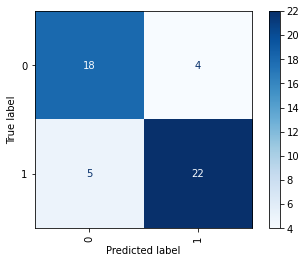

In [18]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='vertical', 
                      values_format='.0f',
                      cmap='Blues');

Given a confusion matrix, calculate accuracy, precision, and recall.

Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">30</td>
    <td style="border: solid">4</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">99</td>
    <td style="border: solid"> 12</td>
  </tr>
</table>

In [19]:
true_neg = 30
false_neg = 99
true_pos = 12
false_pos = 4
total_population = true_neg + false_neg + true_pos + false_pos

In [20]:
#Accuracy
#Total correct predictions/ Total predictions

accuracy = (true_neg + true_pos)/total_population
print(f'Confusion Matrix Accuracy: {accuracy*100:.0f}%')

Confusion Matrix Accuracy: 29%


In [21]:
#Precision
#True positives/ Sum of true positives and false positives

precision = true_pos/ (true_pos + false_pos)
print(f'Confusion Matrix Precision: {precision*100:.0f}%')

Confusion Matrix Precision: 75%


In [22]:
#Recall
#True postives/ True positives and false negatives

recall = true_pos/(true_pos + false_neg)
print(f'Confusion Matrix Recall: {recall*100:.0f}%')

Confusion Matrix Recall: 11%
